<font size="6">時系列データの異常検知</font>

Source: Pythonによる時系列データの異常検知
    
https://blog.brains-tech.co.jp/entry/2017/10/17/170140

<font size="5">データの準備</font>

心拍数のデータをダウンロードする(リポジトリをクローンしておけば予め用意される)<br>
<a href="http://www.cs.ucr.edu/~eamonn/discords/qtdbsel102.txt">http://www.cs.ucr.edu/~eamonn/discords/qtdbsel102.txt</a>

上記のデータを自身のGoogleドライブにアップロードしておく。今回はdatasetというフォルダを作成してそこに置いている想定です。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive/dataset')

## 時系列データの解析

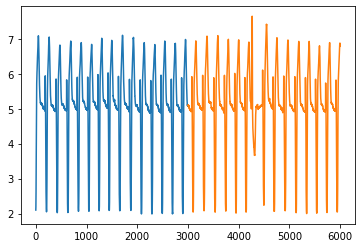

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./qtdbsel102.txt", sep="\t", header=None)
plt.plot(df.loc[:2999, 2])
plt.plot(df.loc[3000:5999, 2])

In [11]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

'''
dataをsize毎のスライス窓に分割
'''
def embed(data, size):
    window = np.empty((0, size))
    for index in range(0, len(data)-size+1):
        new_window = [data[i] for i in range(index, index+size)]
        window = np.append(window, np.array([new_window]), axis=0)
    return window

# 前から3000件を学習データ、その次の3000件をテストデータとする
train = df.loc[:2999, 2]
test = df.loc[3000:5999, 2].reset_index(drop=True)

# サイズ100のスライス窓に分割
#train_window = embed(train.as_matrix(), 100)
#test_window = embed(test.as_matrix(), 100)
train_window = embed(train.values, 100)
test_window = embed(test.values, 100)

In [12]:
# 学習データでモデルを生成し、学習データについて異常度（最近傍までの距離を）算出
nbrs = NearestNeighbors(n_neighbors=1, n_jobs=-1).fit(train_window)
distances, indices = nbrs.kneighbors(test_window)

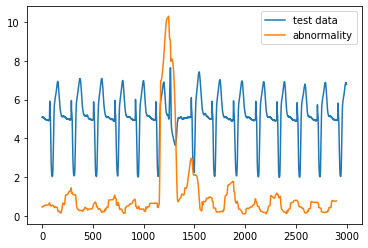

In [13]:
# テストデータと異常度のプロット
plt.plot(test)
plt.plot(distances)
plt.legend(["test data", "abnormality"])